# Manejo de rutas del sistema: PyFilesystem2

Existe otro manejador de rutas llamado `PyFilesystem2` que permitirá hacer rutas agnósticas independiente de donde estén ubicados, por ejemplo:    
- dentro de un archivo ZIP
- en la nube
- en mi computadora local

Exploremos.

Importar la librería: `import fs`, ahora tenemos que abrir una conexión para que a partir de ella puedas comenzar a trabajar.

```py
# abrir una conexión en el directorio actual (.)
fs.open_fs(".")
# guardarlo la ruta actual en una variable
CURRENT_DIR = fs.open_fs(".")
# preguntar si existe la ruta
CURRENT_DIR.exists('.')
# consultando ruta inexistente
CURRENT_DIR.exists('./lalala')
# si queremos consultar la dirección de atras
CURRENT_DIR.exists('..') #Nos va a mandar un error
# abriendo una nueva conexión
fs.open_fs("../data/raw")
# dando nombre al directorio
DATA_DIR fs.open_fs("../data/raw")
# checar métodos disponibles
DATA_DIR.listdir(".")
# iterar sobre archivos
for path in DATA_DIR.walk.files():
    print(path)
#Crear carpetas dentro del sistema que tenemos conexión
DATA_DIR.makedir('external_fs',recreate=True)
```
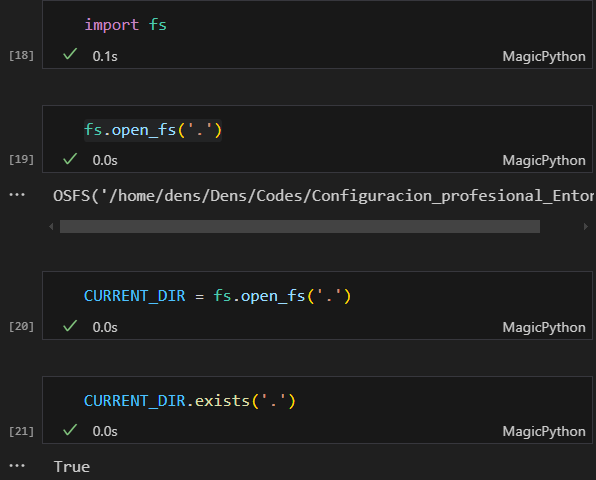

Me regresa un objeto **OSFS (Operating System Filesystem)**, dentro del objeto nos aparece la ruta que nos interesa y que sabemos que estamos ahí.

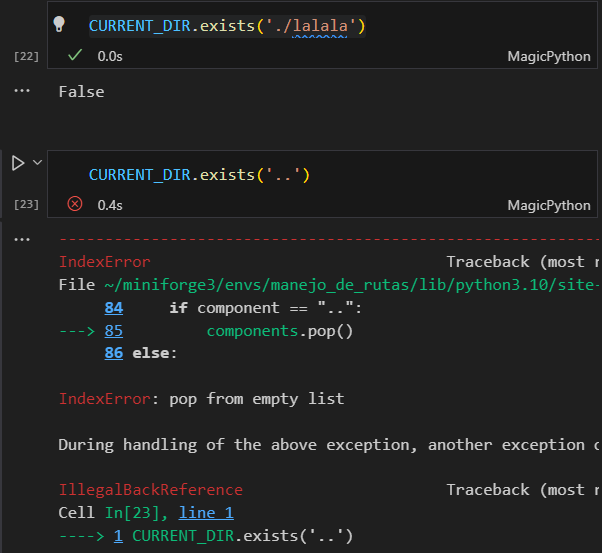

La razón del error es que solo trabaja dentro del directorio que estableciste el objeto, no puede manipular rutas fuera de el.

**Solución:** Si queremos acceder a la ruta padre, tendremos que crear un nuevo objeto. Debemos notar que no es necesario recurrir a los métodos como `joinpath` de las librerías anteriores, este manejador usa solo `slash`.

La gran ventaja de este manejador de rutas, es el uso de `slashes` independientemente del sistema operativo y de donde se encuentre tu proyecto.

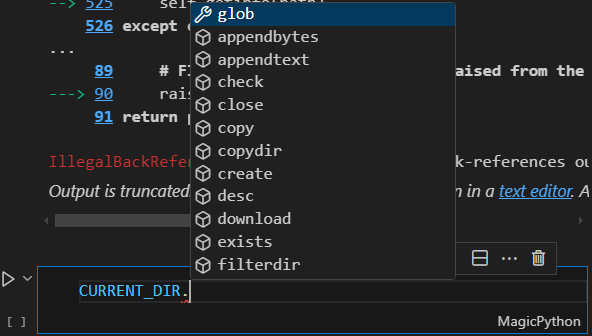

Cuenta con muchos métodos.

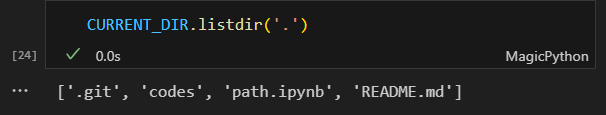

```py
for path in DATA_DIR.walk.files():
    print(path)
```

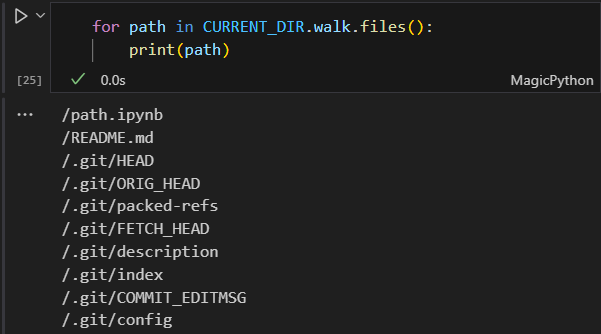

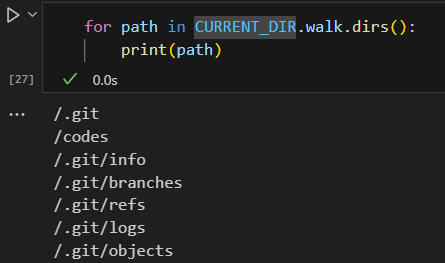

Nota que las rutas comienza con `/`, esto indica que la raíz es del directorio que estas listando.

Si queremos abrir el archivo hacemos lo siguiente

```py
for path in DATA_DIR.walk.files():
    print(path)

    with DATA_DIR.open(path) as data_file:
        print(data_file.readlines())
```

`DATA_DIR.makedir('external_fs',recreate=True)`, me crea un SubFS.

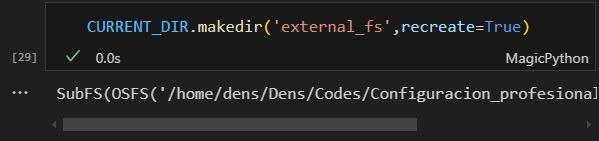

Con este nuevo SubFS también podemos manipularlo como una conexión nueva, realizando las mismas operaciones que hasta el momento hemos hecho.

**OJO: También podemos abrir una conexión dentro de un archivo ZIP y usar las mismas funcionalidades**


## Extras:

[PyFilesystem2](https://docs.pyfilesystem.org/en/latest/introduction.html)